In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib import rcParams
from ipywidgets import interact, widgets
import plotly.graph_objs as go
from IPython.display import display
from metpy.calc import specific_humidity_from_dewpoint as shfd
from metpy.units import units

In [9]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


In [10]:
#CSV files
csv_files = sorted([f for f in os.listdir("Rural_Site_23_29_May/metwxt") if f.endswith(".csv")])


In [2]:
### To create concatenated data table ###

all_temp = []
all_rh = []
all_precip = []
all_base_time = []
all_atmos_press = []
all_time = []

for i in csv_files:
    df = pd.read_csv(f"Rural_Site_23_29_May/metwxt/{i}")
    df = df[['wxt_precip_rate_mean', 'rh_mean', 'temp_mean', 'atmos_pressure', 'base_time', 'time']]
    
    all_precip.extend(df['wxt_precip_rate_mean'])
    all_rh.extend(df['rh_mean'])
    all_temp.extend(df['temp_mean'])
    all_base_time.extend(df['base_time'])
    all_time.extend(df['time'])
    all_atmos_press.extend(df['atmos_pressure'])
    

# Create final DataFrame
temp_rh_precip_df = pd.DataFrame({
    'wxt_precip_rate_mean': all_precip,
    'rh_mean': all_rh,
    'temp_mean': all_temp,
    'base_time': all_base_time,
    'atmos_pressure': all_atmos_press,
    'time': all_time
})

# # Save to CSV
temp_rh_precip_df.to_csv("temp_rh_precip_rural_combined.csv", index=False)

#############################################################################################

#From metpy package: Create a new column for data that contains dew point and specific humidity

# Calculate dew point using your formula : T - ((100- RH)/5)
data_balt['dew_point'] = data_balt['temp_mean'] - ((100 - data_balt['rh_mean']) / 5)

# Convert pressure from kPa to hPa
pressure = (data_balt['atmos_pressure'] * 10).values * units.hPa

# Convert dew point to proper units
dew_point = data_balt['dew_point'].values * units.degC

# Compute specific humidity
sh = shfd(pressure, dew_point).to('g/kg')

# Add to dataframe
data_balt['specific_humidity'] = sh.magnitude  # only store the values, not units

# # Save updated CSV
data_balt.to_csv("temp_rh_precip_rural_combined.csv", index=False)


NameError: name 'data_balt' is not defined

In [2]:
data_balt = pd.read_csv("temp_rh_precip_combined.csv")
data_balt
#data_balt['specific_humidity'] 

,org_precip_rate_mean,rh_mean,temp_mean,base_time,atmos_pressure,time,dew_point,specific_humidity
0,0.0,91.10,15.00,2025-05-23,100.37,2025-05-23 00:00:00,13.220,9.457980
1,0.0,91.10,14.99,2025-05-23,100.37,2025-05-23 00:01:00,13.210,9.451775
2,0.0,91.00,14.98,2025-05-23,100.37,2025-05-23 00:02:00,13.180,9.433181
3,0.0,91.60,14.95,2025-05-23,100.37,2025-05-23 00:03:00,13.270,9.489060
4,0.0,92.40,14.88,2025-05-23,100.38,2025-05-23 00:04:00,13.360,9.544275
...,...,...,...,...,...,...,...,...
10075,0.0,74.05,21.65,2025-05-29,100.90,2025-05-29 23:55:00,16.460,11.607110
10076,0.0,74.33,21.60,2025-05-29,100.90,2025-05-29 23:56:00,16.466,11.611572
10077,0.0,74.42,21.61,2025-05-29,100.90,2025-05-29 23:57:00,16.494,11.632412
10078,0.0,74.32,21.61,2025-05-29,100.89,2025-05-29 23:58:00,16.474,11.618682


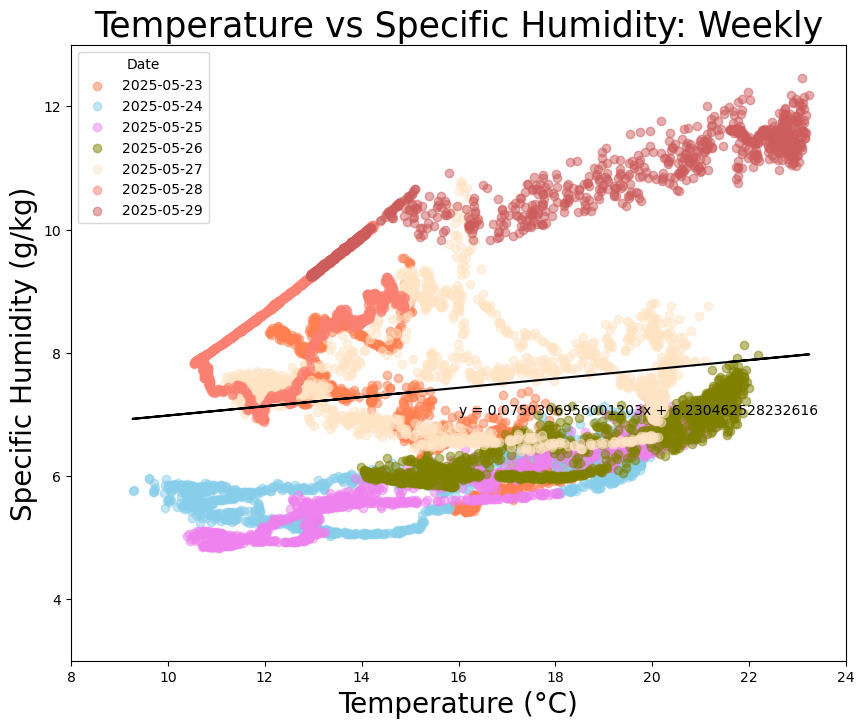

In [3]:
temperature = data_balt.temp_mean
humidity = data_balt.specific_humidity
dates = data_balt.base_time
poli_temp = []
poli_sh= []


target_dates = ["2025-05-23", 
                "2025-05-24", 
                "2025-05-25", 
                "2025-05-26", 
                "2025-05-27", 
                "2025-05-28", 
                "2025-05-29"]

colors = ["coral", "skyblue", "violet","olive", "bisque", "salmon", "indianred"]

# Track if we've already added a label for a given date
labels_added = set()

plt.figure(figsize=(10, 8))

for a, date in enumerate(dates):
    if date in target_dates:
        idx = target_dates.index(date)
        color = colors[idx]

        # Only add the label once per date
        if date not in labels_added:
            plt.scatter(temperature[a], humidity[a], color= color, alpha=0.5, label=target_dates[idx])
            labels_added.add(date)
        else:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5)
            
        poli_temp.append(temperature[a])
        poli_sh.append(humidity[a])

poli_temp = np.array(poli_temp)  # Convert to NumPy array
poli_sh = np.array(poli_sh)      # Optional: convert the other one too for safety

slope, inter = np.polyfit(poli_temp, poli_sh, 1)
plt.plot(poli_temp, slope*poli_temp + inter, color="black")
        
# Final touches
plt.xlabel("Temperature (°C)", fontsize=20)
plt.ylabel("Specific Humidity (g/kg)", fontsize=20)
plt.xlim(8,24)
plt.ylim(3,13)
plt.text(16,7, f"y = {slope}x + {inter}")
plt.title("Temperature vs Specific Humidity: Weekly", fontsize=25)
plt.legend(title="Date")
#plt.grid(True)
plt.show()


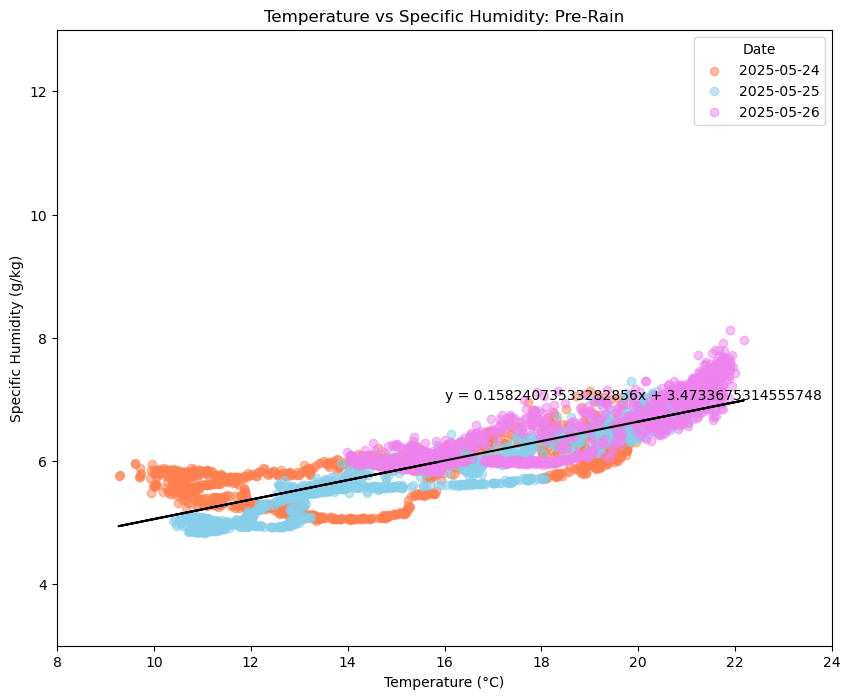

In [93]:
target_dates = ["2025-05-24", "2025-05-25", "2025-05-26"]
colors = ["coral", "skyblue", "violet"]

# Track if we've already added a label for a given date
labels_added = set()

plt.figure(figsize=(10, 8))

for a, date in enumerate(dates):
    if date in target_dates:
        idx = target_dates.index(date)
        color = colors[idx]

        # Only add the label once per date
        if date not in labels_added:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5, label=target_dates[idx])
            labels_added.add(date)
        else:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5)
            
        poli_temp.append(temperature[a])
        poli_sh.append(humidity[a])

poli_temp = np.array(poli_temp)  # Convert to NumPy array
poli_sh = np.array(poli_sh)      # Optional: convert the other one too for safety

slope, inter = np.polyfit(poli_temp, poli_sh, 1)
plt.plot(poli_temp, slope*poli_temp + inter, color="black")
        
# Final touches
plt.xlabel("Temperature (°C)")
plt.ylabel("Specific Humidity (g/kg)")
plt.xlim(8,24)
plt.ylim(3,13)
plt.text(16,7, f"y = {slope}x + {inter}")
plt.title("Temperature vs Specific Humidity: Pre-Rain")
plt.legend(title="Date")
#plt.grid(True)
plt.show()

target_dates = ["2025-05-27", "2025-05-28"]
colors = ["teal", "orange"]

# Track if we've already added a label for a given date
labels_added = set()

plt.figure(figsize=(10, 8))

for a, date in enumerate(dates):
    if date in target_dates:
        idx = target_dates.index(date)
        color = colors[idx]

        # Only add the label once per date
        if date not in labels_added:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5, label=target_dates[idx])
            labels_added.add(date)
        else:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5)

# Final touches
plt.xlabel("Temperature (°C)")
plt.ylabel("Specific Humidity (g/kg)")
plt.xlim(8,24)
plt.ylim(3,13)
plt.title("Temperature vs Specific Humidity: Rain")
plt.legend(title="Date")
#plt.grid(True)
plt.show()

target_dates = ["2025-05-29"]
colors = ["olive"]

# Track if we've already added a label for a given date
labels_added = set()

plt.figure(figsize=(10, 8))

for a, date in enumerate(dates):
    if date in target_dates:
        idx = target_dates.index(date)
        color = colors[idx]

        # Only add the label once per date
        if date not in labels_added:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5, label=target_dates[idx])
            labels_added.add(date)
        else:
            plt.scatter(temperature[a], humidity[a], color=color, alpha=0.5)

# Final touches
plt.xlabel("Temperature (°C)")
plt.ylabel("Specific Humidity (g/kg)")
plt.xlim(8,24)
plt.ylim(3,13)
plt.title("Temperature vs Specific Humidity: Post-Rain")
plt.legend(title="Date")
#plt.grid(True)
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


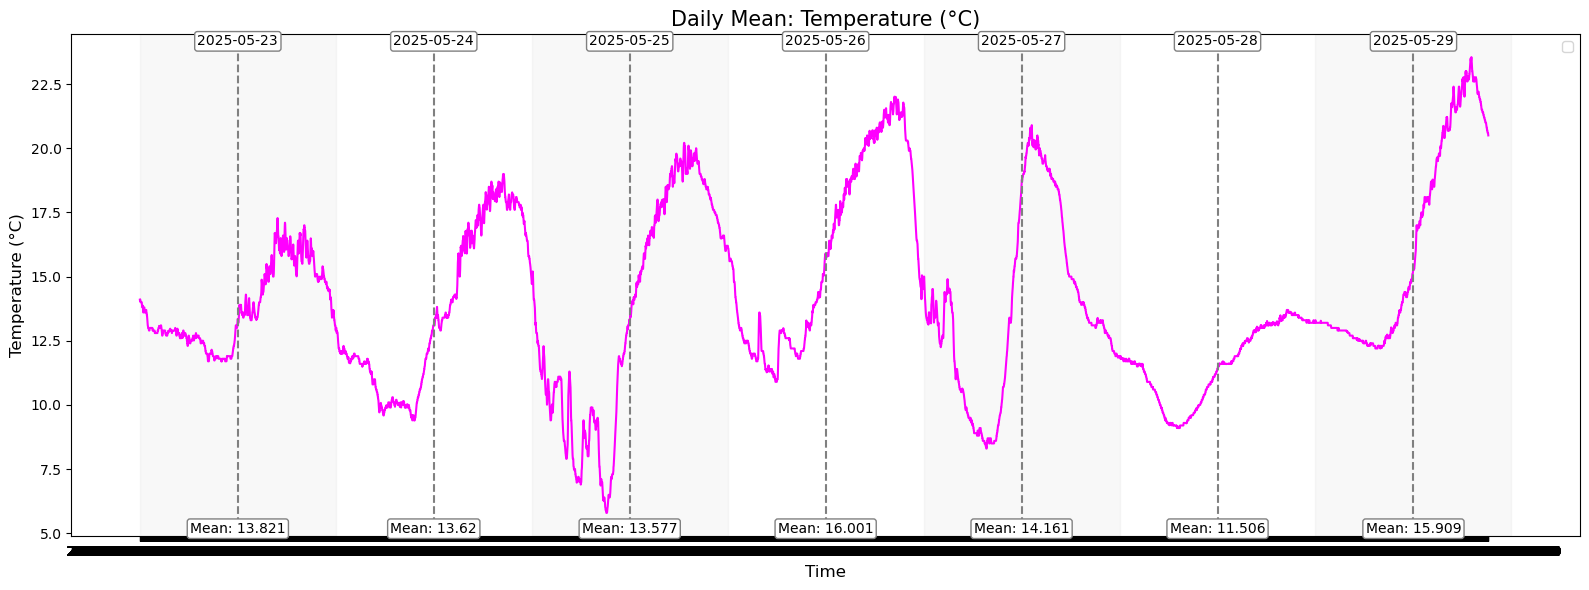

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


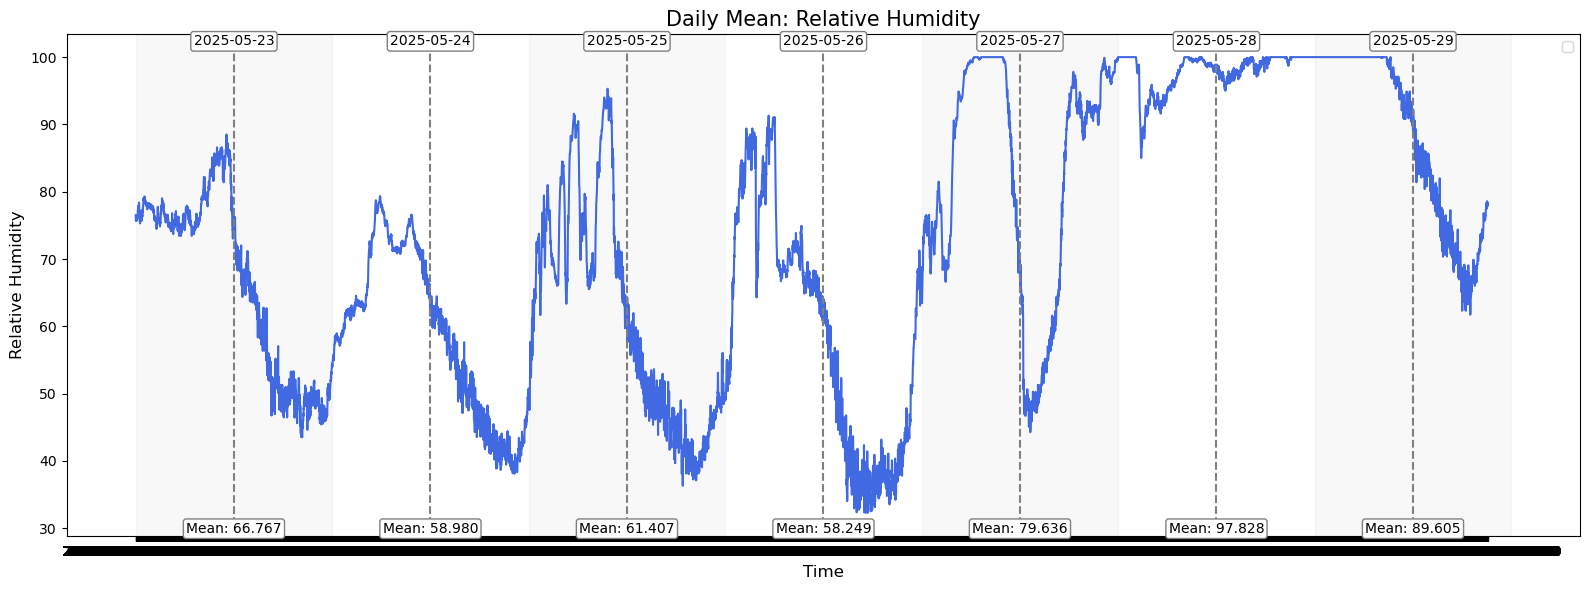

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


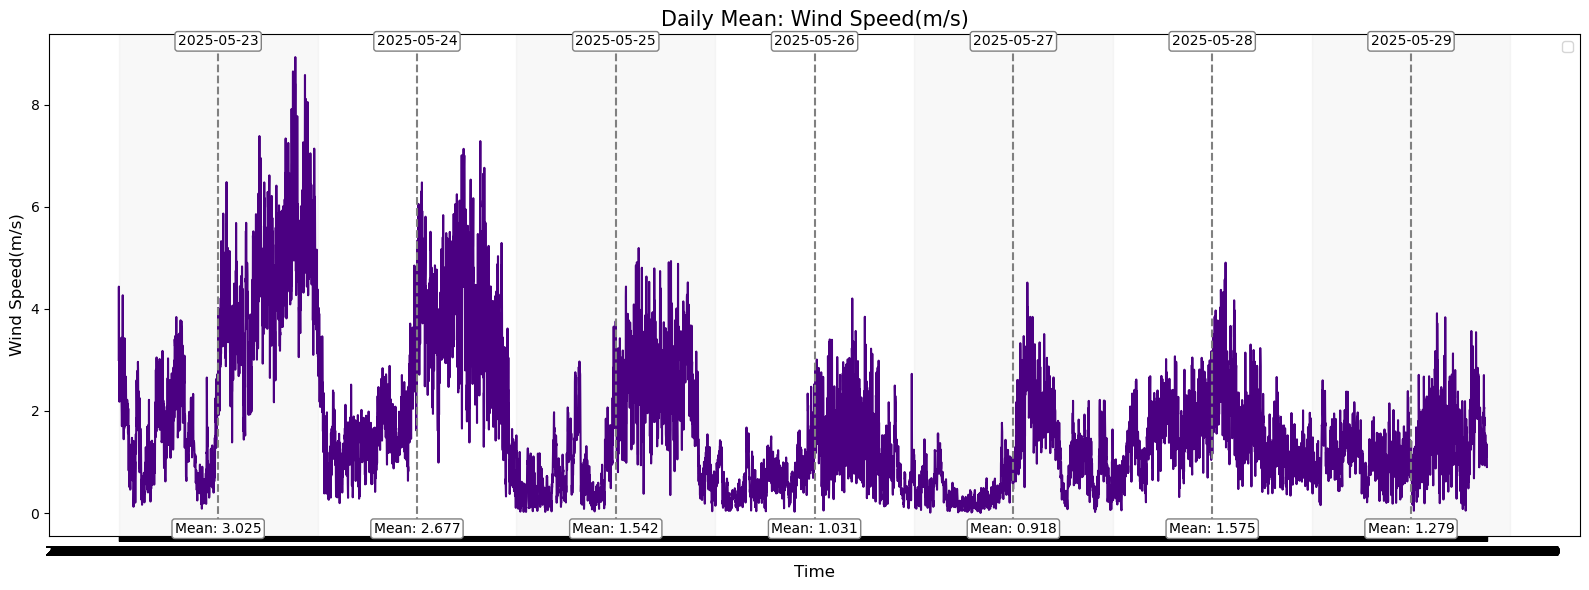

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


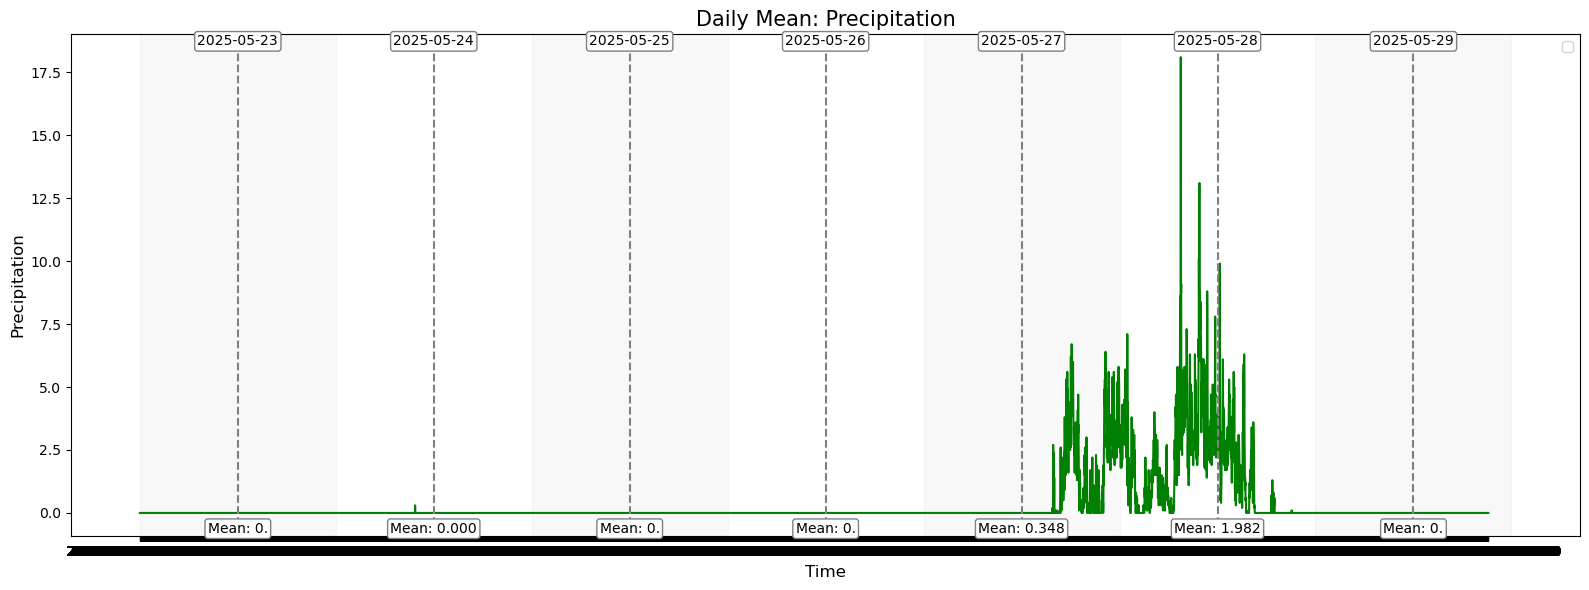

In [17]:
####################################### RURAL METEROLOGICAL PLOTS #################################################

#CSV files
csv_files = sorted([f for f in os.listdir("Rural_Site_23_29_May/metwxt") if f.endswith(".csv")])


# Arrays to concatenate all files data
all_times = []
all_temps = []
all_rh = []
all_wds = []
all_pres = []
days = []
temp_mean_daily = []
rh_mean_daily = []
wds_mean_daily = []
pres_mean_daily = []

minutes_per_day = 1440 

for i, file in enumerate(csv_files):
    data = pd.read_csv(f"Rural_Site_23_29_May/metwxt/{file}")
    time_shifted = data.time
    all_times.extend(time_shifted)
    all_temps.extend(data.temp_mean)
    all_rh.extend(data.rh_mean)
    all_wds.extend(data.wspd_vec_mean)
    all_pres.extend(data.wxt_precip_rate_mean)
    
    #For plotting dates of taken data
    days_of_dat = data.base_time
    days.append(days_of_dat[0])
    
    temp_mean_ = np.mean(data.temp_mean)
    temp_mean_ = np.format_float_positional(temp_mean_, precision=3)
    temp_mean_daily.append(temp_mean_)
    
    rh_mean_ = np.mean(data.rh_mean)
    rh_mean_= np.format_float_positional(rh_mean_, precision=3)
    rh_mean_daily.append(rh_mean_)
    
    wds_mean_ = np.mean(data.wspd_vec_mean)
    wds_mean_= np.format_float_positional(wds_mean_, precision=3)
    wds_mean_daily.append(wds_mean_)
    
    pres_mean_ = np.mean(data.wxt_precip_rate_mean)
    pres_mean_= np.format_float_positional(pres_mean_, precision=3)
    pres_mean_daily.append(pres_mean_)
      

# Numpy Arrays
all_times = np.array(all_times)
all_temps = np.array(all_temps)
all_rh = np.array(all_rh)
all_wds = np.array(all_wds)
all_pres = np.array(all_pres)

variables=[all_temps, all_rh, all_wds, all_pres]
var_alias=["Temperature (°C)", "Relative Humidity", "Wind Speed(m/s)", "Precipitation"]
var_mean=[temp_mean_daily, rh_mean_daily, wds_mean_daily, pres_mean_daily]
colors= ["magenta","royalblue","indigo", "green"]

c = 0
for a_var in variables:
    
    # Plot
    plt.figure(figsize=(16, 6))
    plt.plot(all_times, a_var, color=colors[c])
    #plt.axhline(whole_mean_temp, color='gray', linestyle='--', label=f"Mean Temp: {whole_mean_temp:.2f}°C")

    plt.title(f"Daily Mean: {var_alias[c]}", fontsize=15)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel(var_alias[c], fontsize=12)

    ax = plt.gca()

    a=0
    # Marcar el inicio y etiquetar cada día
    for i in range(len(csv_files)):

        start = i * minutes_per_day
        end = (i + 1) * minutes_per_day

        center = start + minutes_per_day / 2
        
        plt.axvline(center, color='gray', linestyle='--')
        
        #Mean Value and date
        plt.text(center, (float(ax.get_ylim()[1])), days[a], fontsize=10, ha='center', va='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray"))
        plt.text(center, (float(ax.get_ylim()[0])), f"Mean: {var_mean[c][i]}", fontsize=10, ha='center', va='bottom', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray"))
 
        # Gray Area for better plot separation
        if i % 2 == 0:
            plt.axvspan(start, end, color='gray', alpha=0.05)

        
        a=a+1
        
    c=c+1

    plt.legend()
    plt.tight_layout()
    plt.show()

In [2]:
met_sebs_df = pd.read_csv("Rural_Site_23_29_May/sebs/crgsebsS2.b1.20250528.000000.custom.csv")


In [22]:
#CSV files
csv_met_files = sorted([f for f in os.listdir("Rural_Site_23_29_May/metwxt") if f.endswith(".csv")])
#csv_met_files = sorted([f for f in os.listdir() if f.endswith(".csv")])

minutes_30_per_day = 48

# Arrays to concatenate all files data
all_times = []
all_temps = []
all_rh = []
all_wds = []
all_pres = []
all_atmospre = []
days = []
temp_mean_daily = []
rh_mean_daily = []
wds_mean_daily = []
pres_mean_daily = []

for i, file in enumerate(csv_met_files):
    data = pd.read_csv(f"Rural_Site_23_29_May/metwxt/{file}")
    #data = pd.read_csv(file)

    # Convert 'time' column to datetime format
    data['time'] = pd.to_datetime(data['time'])

    # Set 'time' as the index
    data.set_index('time', inplace=True)

    # Filtrar solo las columnas numéricas antes del resampleo
    data_numeric = data.select_dtypes(include='number')

    # Resample every 30 minutes and compute the mean
    data_30min = data_numeric.resample('30T').mean().dropna()

    # Recuperar los timestamps como strings
    time_shifted = data_30min.index.strftime('%Y-%m-%d %H:%M:%S')

    # Agregar datos
    all_times.extend(time_shifted)
    all_temps.extend(data_30min.temp_mean)
    all_rh.extend(data_30min.rh_mean)
    all_wds.extend(data_30min.wspd_vec_mean)
    #all_pres.extend(data_30min.wxt_precip_rate_mean)
    all_atmospre.extend(data_30min.atmos_pressure)

    # Fecha base del archivo para graficar o identificar
    base_date = data_30min.index[0].strftime('%Y-%m-%d')
    days.append(base_date)

all_temps= np.array(all_temps)* units.degC
all_rh= np.array(all_rh)
all_atmospre = np.array(all_atmospre)
    
#################################################################################################

csv_soil_files = sorted([f for f in os.listdir("Rural_Site_23_29_May/sebs") if f.endswith(".csv")])

# Arrays to concatenate all files data
all_times = []
all_soil_moist = []
all_wetness = []
all_net_radiation = []
all_surface_energy_balance = []

days = []

for i, file in enumerate(csv_soil_files):
    
    data = pd.read_csv(f"Rural_Site_23_29_May/sebs/{file}")
    time_shifted = data.time
    all_times.extend(time_shifted)
    all_soil_moist.extend(data.soil_moisture_1)
    all_wetness.extend(data.wetness)
    all_net_radiation.extend(data.net_radiation)
    all_surface_energy_balance.extend(data.surface_energy_balance)

    #For plotting dates of taken data
    days_of_dat = data.base_time
    days.append(days_of_dat[0])

In [30]:
minutes_30_per_day = 48

# Arrays to concatenate all files data
all_times = []
all_temps = []
all_rh = []
#all_wds = []
all_pres = []
all_atmospre = []
all_sh=[]
days = []
temp_mean_daily = []
rh_mean_daily = []
wds_mean_daily = []
pres_mean_daily = []


data = pd.read_csv("temp_rh_precip_rural_combined.csv")
#data = pd.read_csv(file)

# Convert 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Set 'time' as the index
data.set_index('time', inplace=True)

# Filtrar solo las columnas numéricas antes del resampleo
data_numeric = data.select_dtypes(include='number')

# Resample every 30 minutes and compute the mean
data_30min = data_numeric.resample('30T').mean().dropna()

# Recuperar los timestamps como strings
time_shifted = data_30min.index.strftime('%Y-%m-%d %H:%M:%S')

# Agregar datos
all_times.extend(time_shifted)
all_temps.extend(data_30min.temp_mean)
all_rh.extend(data_30min.rh_mean)
#all_wds.extend(data_30min.wspd_vec_mean)
all_sh.extend(data_30min.specific_humidity)
#all_pres.extend(data_30min.wxt_precip_rate_mean)
all_atmospre.extend(data_30min.atmos_pressure)

# Fecha base del archivo para graficar o identificar
base_date = data_30min.index[0].strftime('%Y-%m-%d')
days.append(base_date)

# all_temps= np.array(all_temps)* units.degC
# all_rh= np.array(all_rh)
# all_atmospre = np.array(all_atmospre)


In [31]:
all_sh

[7.363617003731216,
 7.19267382923931,
 7.063506873687067,
 6.976357252184298,
 6.876272148412304,
 6.809296611549219,
 6.867033350176041,
 6.815111134448619,
 6.701420534500308,
 6.697033726199156,
 6.640894620293135,
 6.572358470473896,
 6.671577664863945,
 6.6548864120827895,
 6.557792524195198,
 6.577642346517852,
 6.686382958250596,
 6.703645614993338,
 6.889205721558197,
 7.051503583163718,
 7.117127376325581,
 7.084336965374219,
 7.238673068839782,
 7.238674520593041,
 6.8125273901559105,
 6.580830592845832,
 6.42699231001886,
 6.3970209518097105,
 6.204775859151852,
 6.1310126146889985,
 6.158611183587605,
 6.2271776044060125,
 6.1506757621625985,
 5.967815334739614,
 6.134126856970131,
 6.063246638631087,
 5.949869797002874,
 5.7907880127782905,
 5.816288865020595,
 5.859656133611515,
 5.830497366408182,
 5.648474841556234,
 5.675130086088768,
 5.526773534873812,
 5.408768792196674,
 5.34863326425668,
 5.131803951678561,
 4.994946694888667,
 4.991227496869107,
 5.0403188204853

In [6]:
###################### Correlation PLOTS ##############

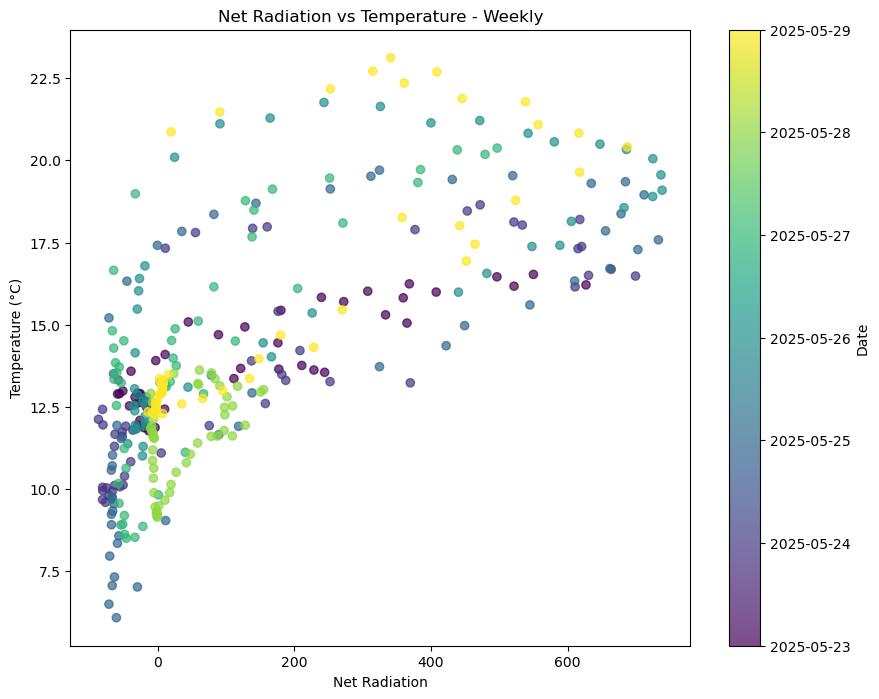

In [24]:

day_labels = []
for d in days:
    day_labels.extend([d] * 48)

# Color by day
unique_days = list(sorted(set(day_labels)))
day_to_num = {day: i for i, day in enumerate(unique_days)}
numeric_labels = [day_to_num[d] for d in day_labels]

# Plot
plt.figure(figsize=(10,8))
sc = plt.scatter(all_net_radiation, all_temps, c=numeric_labels, cmap='viridis', alpha=0.7)

plt.title("Net Radiation vs Temperature - Weekly")
plt.xlabel("Net Radiation")
plt.ylabel("Temperature (°C)")

cbar = plt.colorbar(sc, ticks=range(len(unique_days)))
cbar.ax.set_yticklabels(unique_days)
cbar.set_label("Date")

plt.show()


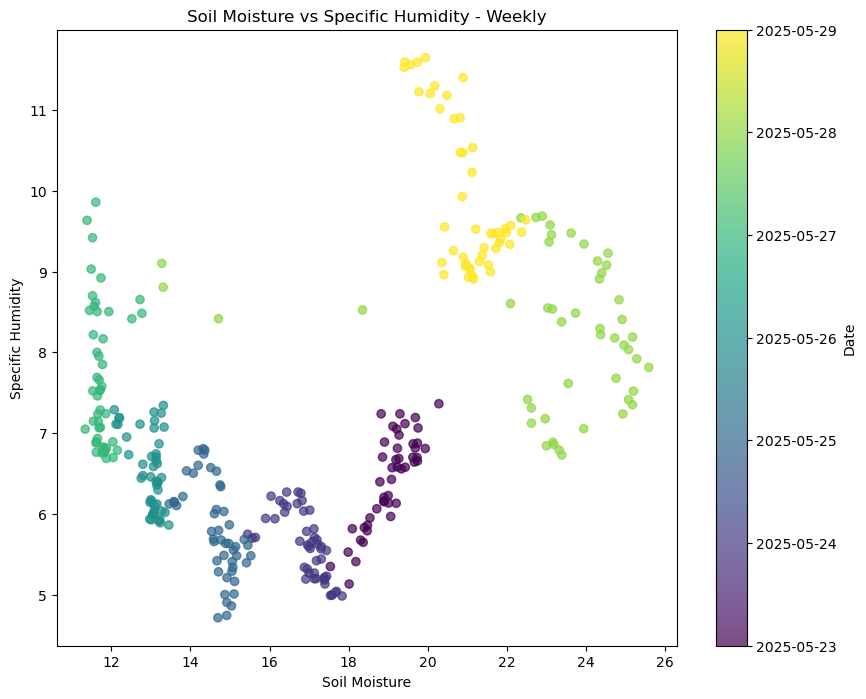

In [34]:
# Plot
plt.figure(figsize=(10,8))
sc = plt.scatter(all_soil_moist, all_sh, c=numeric_labels, cmap='viridis', alpha=0.7)

plt.title("Soil Moisture vs Specific Humidity - Weekly")
plt.xlabel("Soil Moisture")
plt.ylabel("Specific Humidity")

cbar = plt.colorbar(sc, ticks=range(len(unique_days)))
cbar.ax.set_yticklabels(unique_days)
cbar.set_label("Date")

plt.show()


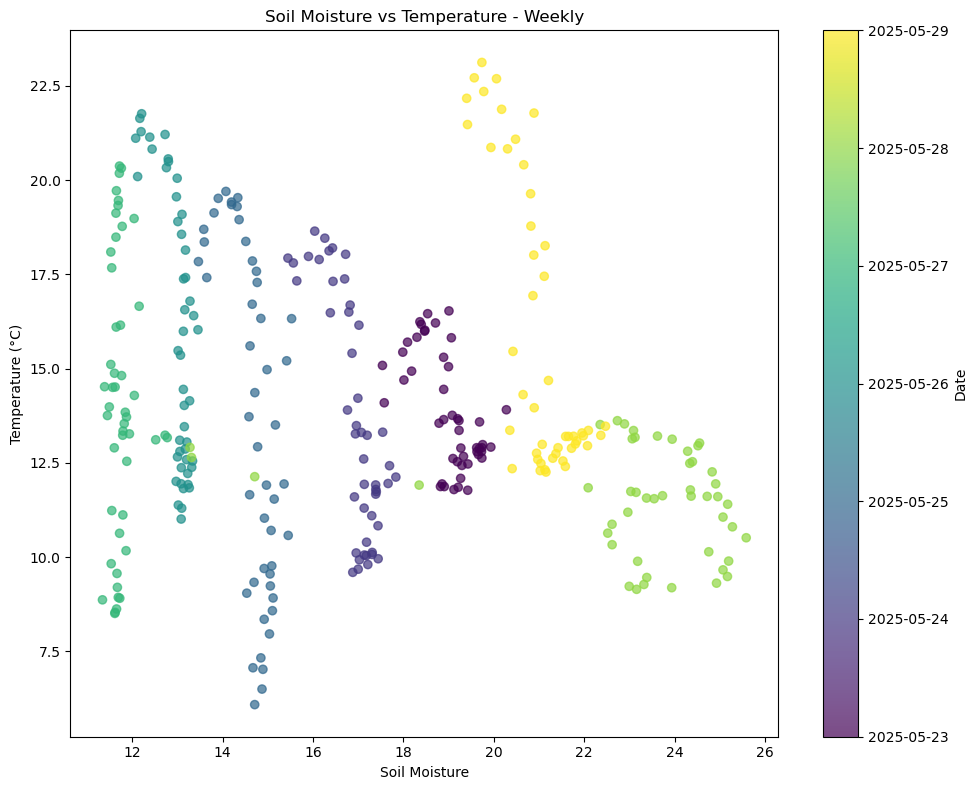

In [71]:
# Plot
plt.figure(figsize=(10,8))
sc = plt.scatter(all_soil_moist, all_temps, c=numeric_labels, cmap='viridis', alpha=0.7)

plt.title("Soil Moisture vs Temperature - Weekly")
plt.xlabel("Soil Moisture")
plt.ylabel("Temperature (°C)")

cbar = plt.colorbar(sc, ticks=range(len(unique_days)))
cbar.ax.set_yticklabels(unique_days)
cbar.set_label("Date")

plt.tight_layout()
plt.show()


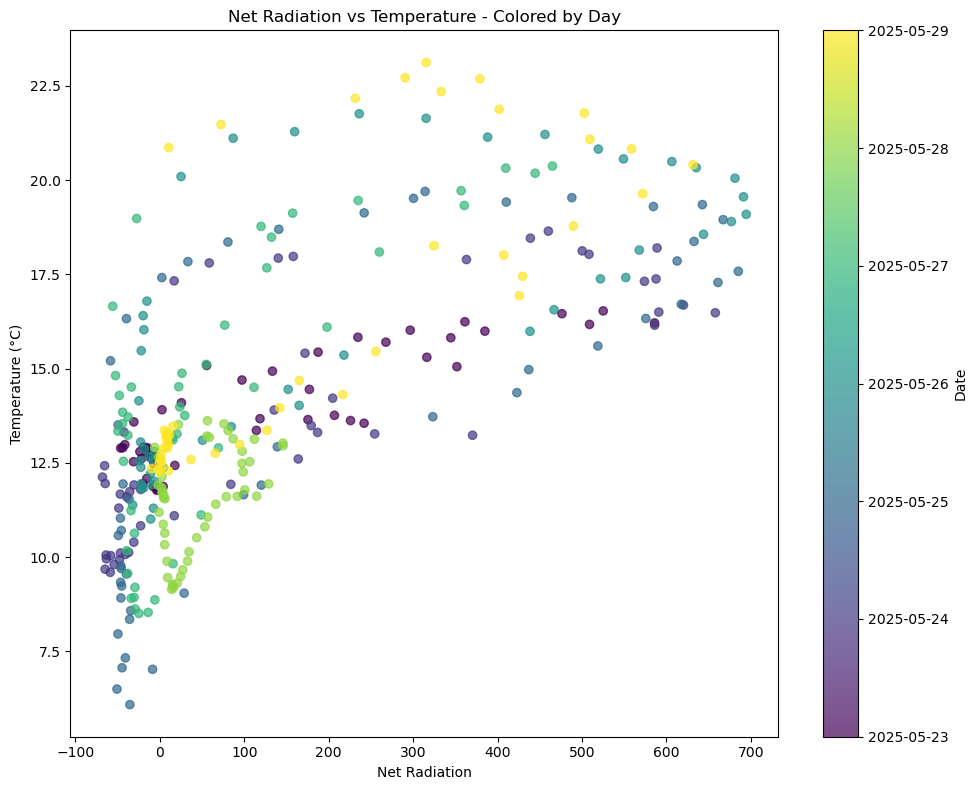

In [70]:
# Plot
plt.figure(figsize=(10,8))
sc = plt.scatter(all_surface_energy_balance, all_temps, c=numeric_labels, cmap='viridis', alpha=0.7)

plt.title("Surface Balnce Energy vs Temperature - Weekly")
plt.xlabel("Surface Balnce Energy")
plt.ylabel("Temperature (°C)")

cbar = plt.colorbar(sc, ticks=range(len(unique_days)))
cbar.ax.set_yticklabels(unique_days)
cbar.set_label("Date")

plt.tight_layout()
plt.show()


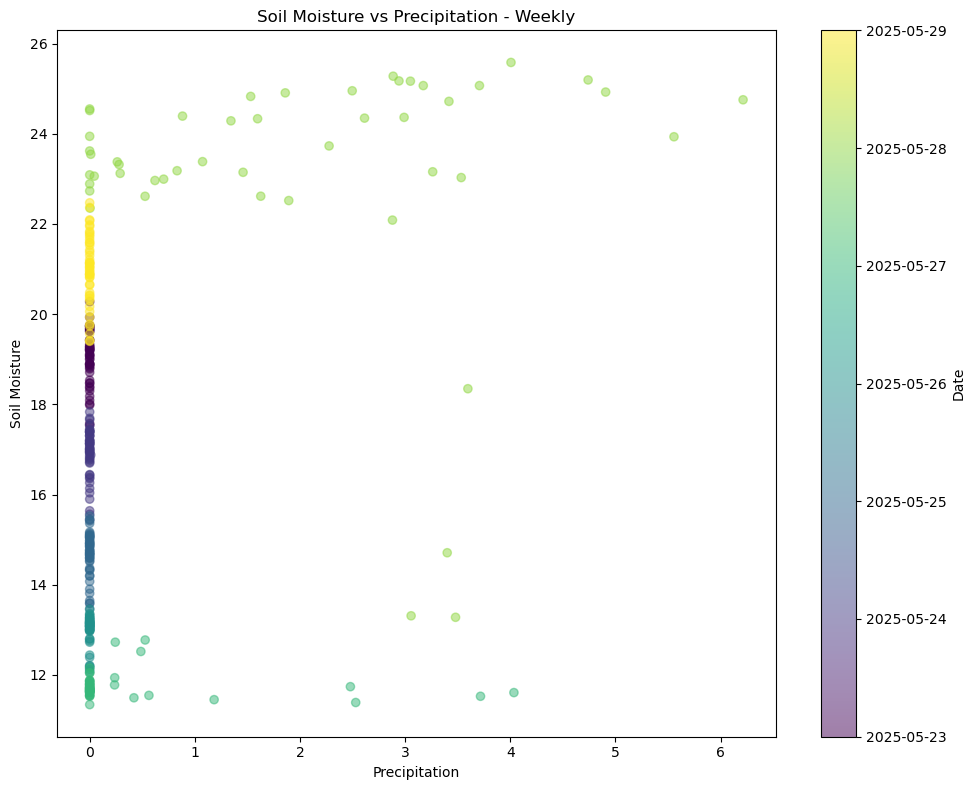

In [82]:
# Plot
plt.figure(figsize=(10,8))

sc = plt.scatter(all_pres, all_soil_moist, c=numeric_labels, cmap='viridis', alpha=0.5)

plt.title("Soil Moisture vs Precipitation - Weekly")
plt.ylabel("Soil Moisture")
plt.xlabel("Precipitation")

# Leyenda de colores
cbar = plt.colorbar(sc, ticks=range(len(unique_days)))
cbar.ax.set_yticklabels(unique_days)
cbar.set_label("Date")

plt.tight_layout()
plt.show()
